## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
from plotnine import *
from math import *

####Prepping the data

In [2]:
ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
ha

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease
...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease
202,Levern Trantow III,35,0,1,138,183,1,182,Disease


####Prepping X & y

In [3]:
X = ha[["age", "chol"]]
y = ha["diagnosis"]

In [ ]:
# def categorize_disease(diagnosis):
#   if diagnosis == "Disease":
#     return 1
#   else:
#     return 0

# ha["diagnosis factorized"] = ha.apply(lambda row: categorize_disease(row["diagnosis"]), axis=1)

# ha

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis,diagnosis factorized
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease,0
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease,1
2,Miles Wolf,62,0,3,130,263,1,97,No Disease,0
3,Mikaila Block,43,1,1,115,303,1,181,Disease,1
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease,1
...,...,...,...,...,...,...,...,...,...,...
199,Bridgett Franecki,55,0,1,128,205,2,130,No Disease,0
200,Mr. Foster Zieme,51,1,3,94,227,1,154,Disease,1
201,Lashanda Hagenes,42,1,2,120,295,1,162,Disease,1
202,Levern Trantow III,35,0,1,138,183,1,182,Disease,1


####Preprocessing

In [4]:
ct = ColumnTransformer(
    [
        ("keep", FunctionTransformer(lambda x: x), ["age", "chol"]),
    ],
    remainder = "drop"
).set_output(transform = "pandas")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

In [5]:
logreg_pipeline = Pipeline(
  [("preprocessing", ct),
  ("log_regression", LogisticRegression())]
)

logreg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('keep',
                                                  FunctionTransformer(func=<function <lambda> at 0x78c208862290>),
                                                  ['age', 'chol'])])),
                ('log_regression', LogisticRegression())])

In [6]:
logreg_pipeline_fitted = logreg_pipeline.fit(X, y)
coef_logreg = logreg_pipeline_fitted.named_steps['log_regression'].coef_

coef_logreg

array([[0.04686331, 0.00180124]])

In [7]:
intercept_logreg = logreg_pipeline_fitted.named_steps['log_regression'].intercept_

intercept_logreg

array([-3.24011226])

In [8]:
zi = log(.9/.1)
zi

2.1972245773362196

zi = 0.047age + 0.001chol - 3.24

0 = 0.04755 + 0.001chol - 3.24

2.197 = 0.04755 + 0.001chol - 3.24

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [9]:
chol_1 = -((0.047*55)-3.24)/.001
print(f"For a 55 years old, the cholesterol needs to be {chol_1} for heart disease to be present")

For a 55 years old, the cholesterol needs to be 655.0000000000002 for heart disease to be present


In [10]:
chol_2 = (zi-((0.04686331*55)-3.24))/.001
print(f"For doctors to be 90% confident that heart disease is present, cholesterol would need to be {chol_2}")

For doctors to be 90% confident that heart disease is present, cholesterol would need to be 2859.7425273362196


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [11]:
lda_pipeline = Pipeline(
  [("preprocessing", ct),
  ("lda_model", LinearDiscriminantAnalysis())]
)

lda_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('keep',
                                                  FunctionTransformer(func=<function <lambda> at 0x78c208862290>),
                                                  ['age', 'chol'])])),
                ('lda_model', LinearDiscriminantAnalysis())])

In [12]:
lda_pipeline_fitted = lda_pipeline.fit(X, y)
coef_lda = lda_pipeline_fitted.named_steps['lda_model'].coef_

coef_lda

array([[0.04655744, 0.00178967]])

In [13]:
intercept_lda = lda_pipeline_fitted.named_steps['lda_model'].intercept_

intercept_lda

array([-3.21967766])

In [14]:
chol_lda = -((0.047*55)-3.2196)/.001
print(f"Using lda, a 55 years old need to have cholesterol as high as {chol_lda} to determine if heart disease is present")

Using lda, a 55 years old need to have cholesterol as high as 634.5999999999998 to determine if heart disease is present


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [15]:
svc_pipeline = Pipeline(
  [("preprocessing", ct),
  ("svc_model", SVC(kernel = "linear"))]
)

svc_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('keep',
                                                  FunctionTransformer(func=<function <lambda> at 0x78c208862290>),
                                                  ['age', 'chol'])])),
                ('svc_model', SVC(kernel='linear'))])

In [16]:
svc_pipeline_fitted = svc_pipeline.fit(X, y)
coef_svc = svc_pipeline_fitted.named_steps['svc_model'].coef_

coef_svc

array([[0.06439772, 0.00365896]])

In [17]:
intercept_svc = svc_pipeline_fitted.named_steps['svc_model'].intercept_

intercept_svc

array([-4.68603406])

In [18]:
chol_svc = -((0.06439772*55)-4.68603406)/0.00365896
print(f"Using svc, a 55 years old need to have cholesterol as high as {chol_svc} to determine if heart disease is present")

Using svc, a 55 years old need to have cholesterol as high as 312.70072916894406 to determine if heart disease is present


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [19]:
#Logistic Regression Values
print(f"Log Reg")
log_intercept = logreg_pipeline_fitted.named_steps["log_regression"].intercept_[0]
print(log_intercept)
coeff_age_log = logreg_pipeline_fitted.named_steps["log_regression"].coef_[0][0]
print(coeff_age_log)
coeff_chol_log = logreg_pipeline_fitted.named_steps["log_regression"].coef_[0][1]
print(coeff_chol_log)

#LDA Values
print(f"LDA")
lda_intercept = lda_pipeline_fitted.named_steps["lda_model"].intercept_[0]
print(lda_intercept)
coeff_age_lda = lda_pipeline_fitted.named_steps["lda_model"].coef_[0][0]
print(coeff_age_lda)
coeff_chol_lda = lda_pipeline_fitted.named_steps["lda_model"].coef_[0][1]
print(coeff_chol_lda)

#SVC Values
print(f"SVC")
svc_intercept = svc_pipeline_fitted.named_steps["svc_model"].intercept_[0]
print(svc_intercept)
coeff_age_svc = svc_pipeline_fitted.named_steps["svc_model"].coef_[0][0]
print(coeff_age_svc)
coeff_chol_svc = svc_pipeline_fitted.named_steps["svc_model"].coef_[0][1]
print(coeff_chol_svc)

Log Reg
-3.2401122588583937
0.04686330613034962
0.0018012385190296785
LDA
-3.2196776604068784
0.04655743553694484
0.0017896671039291314
SVC
-4.686034055211244
0.06439772419707879
0.0036589616029232275


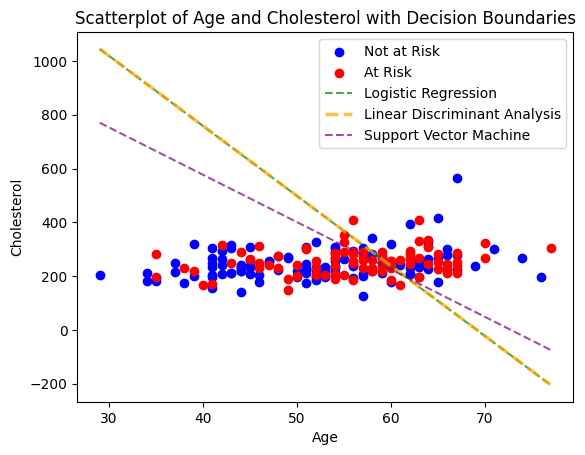

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert to 0 and 1
label_encoder = LabelEncoder()
ha['diagnosis'] = label_encoder.fit_transform(ha['diagnosis'])

# Scatterplot
plt.scatter(ha[ha['diagnosis'] == 0]['age'], ha[ha['diagnosis'] == 0]['chol'], label='Not at Risk', color='blue')
plt.scatter(ha[ha['diagnosis'] == 1]['age'], ha[ha['diagnosis'] == 1]['chol'], label='At Risk', color='red')

# Decision boundary for logistic regression
x_lr = np.linspace(min(ha['age']), max(ha['age']), 100)
y_lr = (-log_intercept - coeff_age_log * x_lr) / coeff_chol_log
plt.plot(x_lr, y_lr, label='Logistic Regression', linestyle='--', color='green', alpha=0.7)

# Decision boundary for linear discriminant analysis
y_lda = (-lda_intercept - coeff_age_lda * x_lr) / coeff_chol_lda
plt.plot(x_lr, y_lda, label='Linear Discriminant Analysis', linestyle='--', color='orange', alpha=0.7, linewidth=2.5)

# Decision boundary for support vector machine
y_svc = (-svc_intercept - coeff_age_svc * x_lr) / coeff_chol_svc
plt.plot(x_lr, y_svc, label='Support Vector Machine', linestyle='--', color='purple', alpha=0.7)

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.title('Scatterplot of Age and Cholesterol with Decision Boundaries')
plt.show()